# 4.1 - Data Cleaning 2


![cleaning2](images/data_cleaning_cycle.avif)

# Ejemplo 1 - Airbnb data


En esta limpieza nos centraremos en tres conceptos:

+ Valores nulos.
+ Datos inconsistentes 
+ Valores atípicos (Outliers)

Primero importamos librerias y los datos.

In [ ]:
%pip install ipython
%pip install seaborn

In [1]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [2]:
# se cargan los datos

airbnb_ori=pd.read_csv('../data/AB_NYC_2019.csv')

airbnb=airbnb_ori.copy()

airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**EDA**

Se comienza la exploracion de los datos.

In [3]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [4]:
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Columnas numericas**

In [5]:
num_df=airbnb.select_dtypes(exclude='object')

num_df.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

**Columnas categoricas**

In [6]:
cat_df=airbnb.select_dtypes(include='object')

cat_df.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

## Valores Nulos

In [7]:
nan_cols=airbnb.isna().sum()   # serie con indice las columnas y valores los nulos

nan_cols[nan_cols>0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [8]:
nan_cols=airbnb.isna().mean() * 100

nan_cols[nan_cols>0]

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

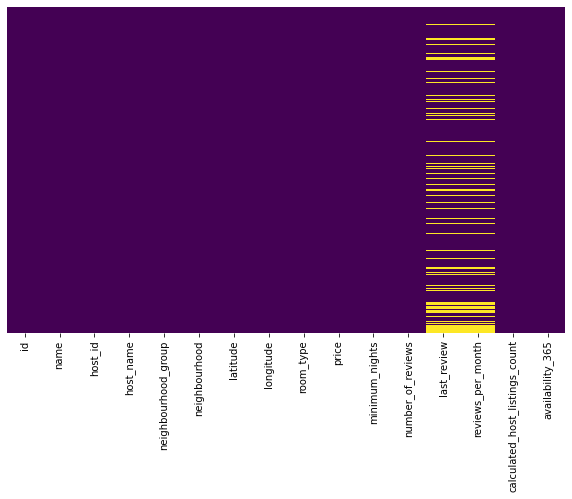

In [9]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))

sns.heatmap(airbnb.isna(), # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show();

In [10]:
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols=airbnb.isna().mean() * 100

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(airbnb.isna(), # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show();

'N nan cols: 4'

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

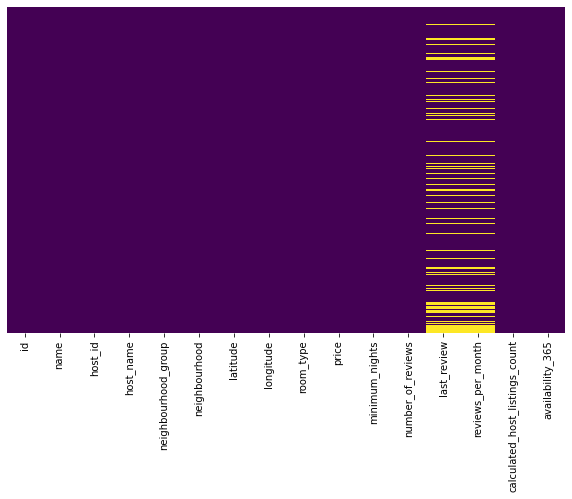

In [11]:
check_nan(airbnb)

**¿Qué hacemos con estos valores?**

In [12]:
# podemos borrar algunas columnas

cols=['id', 'host_id', 'host_name']

airbnb.drop(cols, axis=1, inplace=True)

In [13]:
airbnb['price'].isna().sum()

0

In [14]:
# borrar borrar filas con nulos en cierta columna

airbnb['price'].dropna(inplace=True)

In [15]:
# borrar borrar filas con nulos en varias columnas a la vez

airbnb.dropna(inplace=True, subset=['price', 'latitude', 'longitude'])

In [16]:
# rellenar con la media

airbnb['price'].fillna(airbnb['price'].mean() , inplace=True)

In [17]:
# rellenar con la mediana

airbnb['price'].fillna(airbnb['price'].median() , inplace=True)

In [18]:
# backward/forward fill, normalmente para series temporales

airbnb['price'].bfill()
airbnb['price'].ffill().head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [19]:
# podemos rellenar en un subconjunto de columnas

airbnb.fillna({'reviews_per_month': 0, 'name': 'unknown'}, inplace=True)

In [ ]:
#airbnb.fillna(dict(zip(nan_cols[nan_cols>0].index, ['unknown'])), inplace=True)

In [20]:
nan_cols=airbnb.isna().mean() * 100

nan_cols[nan_cols>0]

last_review    20.558339
dtype: float64

In [ ]:
nan_cols[nan_cols>0].index  # lista con el nombre de las columnas que tienen nulos

In [ ]:
# lista de valores para rellenar

lst=['unknown', 'None', 0]

In [ ]:
dictio=dict(zip(nan_cols[nan_cols>0].index, lst))  # diccionario para rellenar diferente columnas

dictio

In [ ]:
airbnb.fillna(dictio, inplace=True)

**para categorias, una estragia puede ser rellenar con el valor mas frecuente**

'N nan cols: 1'

last_review    20.558339
dtype: float64

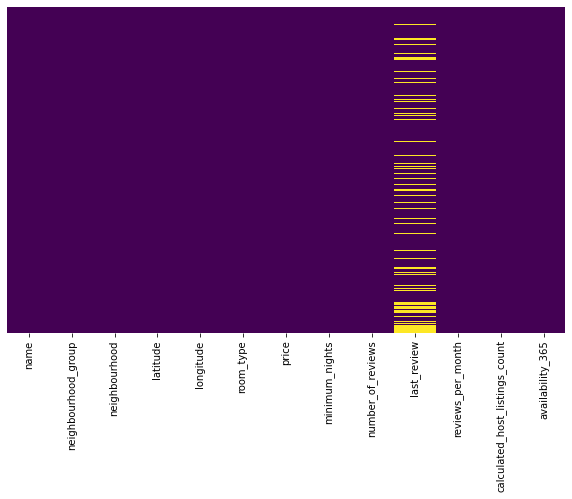

In [21]:
check_nan(airbnb)

## Datos inconsistentes 


**Fechas**

In [22]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     38843 non-null  object 
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [31]:
airbnb.last_review=pd.to_datetime(airbnb.last_review, format='%Y-%m-%d')

airbnb.last_review.dtype.type

numpy.datetime64

In [32]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48895 non-null  object        
 1   neighbourhood_group             48895 non-null  object        
 2   neighbourhood                   48895 non-null  object        
 3   latitude                        48895 non-null  float64       
 4   longitude                       48895 non-null  float64       
 5   room_type                       48895 non-null  object        
 6   price                           48895 non-null  int64         
 7   minimum_nights                  48895 non-null  int64         
 8   number_of_reviews               48895 non-null  int64         
 9   last_review                     38843 non-null  datetime64[ns]
 10  reviews_per_month               48895 non-null  float64       
 11  ca

In [33]:
# asumimos que estan en orden

airbnb.last_review.ffill(inplace=True)

In [34]:
airbnb.last_review.head(10)

0   2018-10-19
1   2019-05-21
2   2019-05-21
3   2019-07-05
4   2018-11-19
5   2019-06-22
6   2017-10-05
7   2019-06-24
8   2017-07-21
9   2019-06-09
Name: last_review, dtype: datetime64[ns]

'N nan cols: 0'

Series([], dtype: float64)

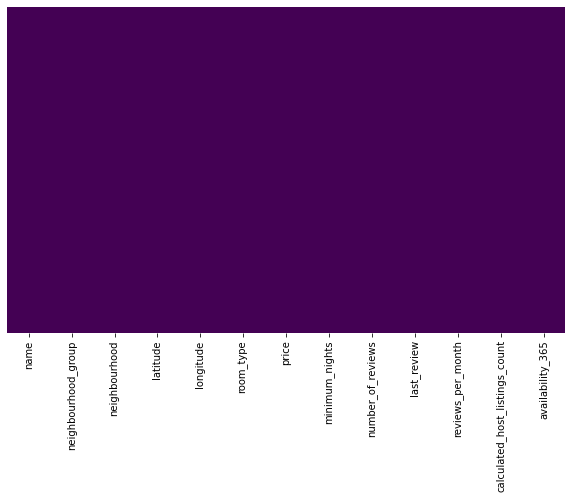

In [35]:
check_nan(airbnb)

**Arreglando errores en strings**

In [37]:
airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [49]:
# introduzco un error en los datos

mal_index=airbnb.sample(2, random_state=42).index  # una muestra de 2 filas (random state es la semilla==>misma muestra cada vez que se ejecuta)

mal_escrito=['manhattatata', 'brookkkllklk']

airbnb.loc[mal_index, 'neighbourhood_group']=mal_escrito

In [50]:
airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20103
Queens            5665
Bronx             1091
Staten Island      373
manhattatata         1
brookkkllklk         1
Name: neighbourhood_group, dtype: int64

In [52]:
airbnb.neighbourhood_group.replace(['manhattatata', 'brookkkllklk'], 
                                   ['Manhattan', 'Brooklyn'],
                                   inplace=True)

In [56]:
airbnb.neighbourhood_group.value_counts()

Manhattan        21662
Brooklyn         20104
Queens            5665
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

**ejemplo:** Busqueda de filas que contengan una palabra clave

In [59]:
# usando regex

key_word='[Nn]oisy'

select=airbnb[airbnb.name.str.contains(key_word, regex=True)]

select

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19733,Noisy room next to Prospect Park,Brooklyn,Prospect-Lefferts Gardens,40.65762,-73.96129,Private room,500,1,0,2018-10-21,0.00,1,89
23857,Small Homey Studio in a Big Noisy City,Manhattan,Harlem,40.81703,-73.93691,Entire home/apt,84,2,3,2017-06-28,0.12,1,0
35343,My wife is not used to the noisy environment. How,Manhattan,Financial District,40.70535,-74.01277,Entire home/apt,200,1,0,2019-06-17,0.00,1,0


In [64]:
airbnb[airbnb.name.str.contains('sweet')].head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7026,"Simple, sweet in NOLITA-NYC",Manhattan,Chinatown,40.71848,-73.99549,Private room,80,3,153,2019-06-25,2.90,1,238
7837,Peaceful room in sweet neighborhood,Queens,Ridgewood,40.70399,-73.91195,Private room,46,4,17,2018-09-08,0.39,2,262
9298,"Charming , sweet , and cozy Manhattan apartment.",Manhattan,Upper East Side,40.76533,-73.96163,Entire home/apt,270,4,44,2019-07-02,0.92,1,335
9474,Park Slope sweet cozy home! Wifi!,Brooklyn,Park Slope,40.67560,-73.97781,Private room,89,5,102,2019-06-19,2.17,1,255
10556,"home, sweet home :-) English, русский, עברית",Queens,Fresh Meadows,40.74267,-73.78737,Entire home/apt,100,1,59,2019-06-09,1.58,3,132


In [65]:
airbnb.shape

(48895, 13)

In [68]:
airbnb.drop(index=select.index, inplace=True)

airbnb.shape

(48892, 13)

In [71]:
# comprobar duplicados

airbnb.duplicated().any()  # ¿hay alguno?, si True sí, entonces drop_duplicates()

False

**Cambio del tipo de dato, optimizacion de memoria**

In [72]:
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48892 non-null  object        
 1   neighbourhood_group             48892 non-null  object        
 2   neighbourhood                   48892 non-null  object        
 3   latitude                        48892 non-null  float64       
 4   longitude                       48892 non-null  float64       
 5   room_type                       48892 non-null  object        
 6   price                           48892 non-null  int64         
 7   minimum_nights                  48892 non-null  int64         
 8   number_of_reviews               48892 non-null  int64         
 9   last_review                     48892 non-null  datetime64[ns]
 10  reviews_per_month               48892 non-null  float64       
 11  ca

In [73]:
for c in airbnb:
    print(c)

name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [74]:
for c in airbnb.select_dtypes('object').columns:
    
    airbnb[c]=airbnb[c].astype('category')

    
    
airbnb.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48892 non-null  category      
 1   neighbourhood_group             48892 non-null  category      
 2   neighbourhood                   48892 non-null  category      
 3   latitude                        48892 non-null  float64       
 4   longitude                       48892 non-null  float64       
 5   room_type                       48892 non-null  category      
 6   price                           48892 non-null  int64         
 7   minimum_nights                  48892 non-null  int64         
 8   number_of_reviews               48892 non-null  int64         
 9   last_review                     48892 non-null  datetime64[ns]
 10  reviews_per_month               48892 non-null  float64       
 11  ca

In [76]:
type(airbnb.name[0])

str

In [77]:
for c in airbnb.select_dtypes('integer').columns:
    
    airbnb[c]=pd.to_numeric(airbnb[c], downcast='integer')

    
    
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48892 non-null  category      
 1   neighbourhood_group             48892 non-null  category      
 2   neighbourhood                   48892 non-null  category      
 3   latitude                        48892 non-null  float64       
 4   longitude                       48892 non-null  float64       
 5   room_type                       48892 non-null  category      
 6   price                           48892 non-null  int16         
 7   minimum_nights                  48892 non-null  int16         
 8   number_of_reviews               48892 non-null  int16         
 9   last_review                     48892 non-null  datetime64[ns]
 10  reviews_per_month               48892 non-null  float64       
 11  ca

In [78]:
for c in airbnb.select_dtypes('float').columns:
    
    airbnb[c]=pd.to_numeric(airbnb[c], downcast='float')

    
    
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48892 non-null  category      
 1   neighbourhood_group             48892 non-null  category      
 2   neighbourhood                   48892 non-null  category      
 3   latitude                        48892 non-null  float32       
 4   longitude                       48892 non-null  float32       
 5   room_type                       48892 non-null  category      
 6   price                           48892 non-null  int16         
 7   minimum_nights                  48892 non-null  int16         
 8   number_of_reviews               48892 non-null  int16         
 9   last_review                     48892 non-null  datetime64[ns]
 10  reviews_per_month               48892 non-null  float32       
 11  ca

In [79]:
airbnb_ori.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Outliers

In [81]:
# outliers

airbnb.price.describe()

count    48892.000000
mean       152.714023
std        240.156106
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [84]:
airbnb[airbnb.price==max(airbnb.price)]

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,Queens,Astoria,40.768101,-73.916512,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.732601,-73.957390,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,1-BR Lincoln Center,Manhattan,Upper West Side,40.772129,-73.986649,Entire home/apt,10000,30,0,2019-06-01,0.00,1,83


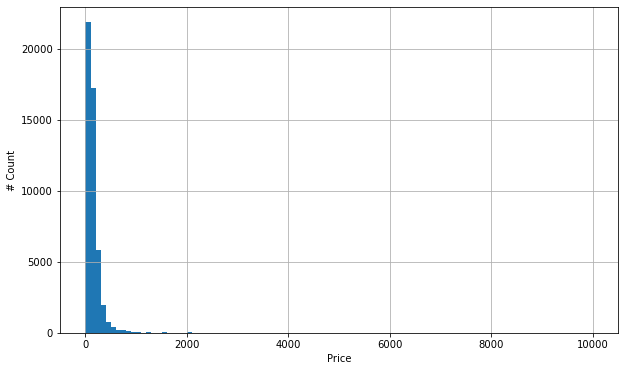

In [87]:
plt.figure(figsize=(10, 6))

airbnb.price.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('Price');

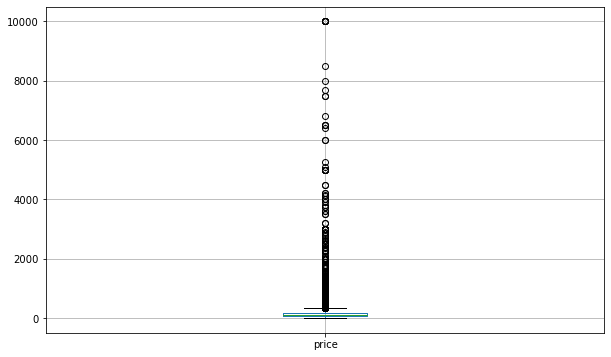

In [89]:
plt.figure(figsize=(10, 6))

airbnb.boxplot(column=['price']);

In [90]:
airbnb.price.describe()

count    48892.000000
mean       152.714023
std        240.156106
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

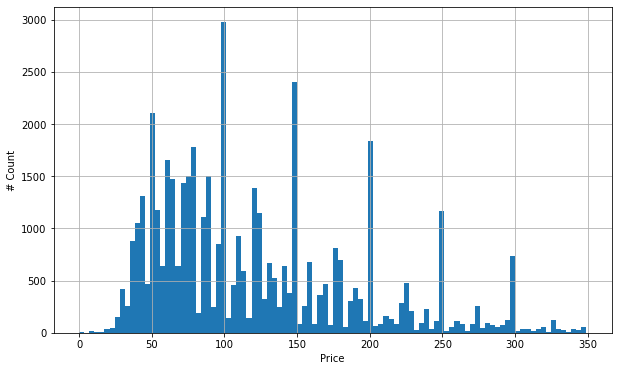

In [91]:
plt.figure(figsize=(10, 6))

data=airbnb[airbnb.price<350].price

data.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('Price');

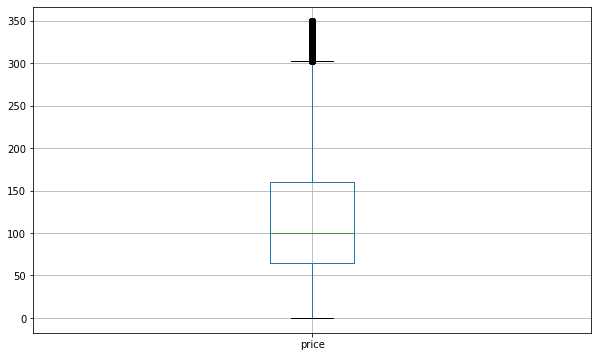

In [93]:
plt.figure(figsize=(10, 6))

airbnb[airbnb.price<350].boxplot(column=['price']);

**depende del contexto**

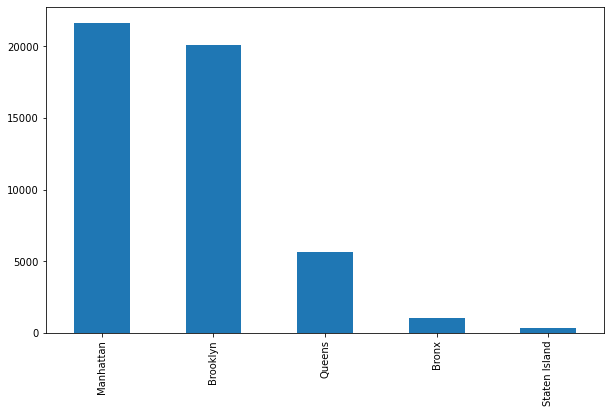

In [98]:
plt.figure(figsize=(10, 6))

airbnb.neighbourhood_group.value_counts().plot.bar();

In [99]:
stats=airbnb.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats['IQR1.5']=1.5 * stats['IQR']+stats['75%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR,IQR1.5
latitude,48892.0,40.730591,0.054554,40.499790,40.690102,40.723074,40.763113,40.913059,0.073011,40.872630
longitude,48892.0,-73.969963,0.049468,-74.244423,-73.983070,-73.955681,-73.936272,-73.712990,0.046799,-73.866074
price,48892.0,152.714023,240.156106,0.000000,69.000000,106.000000,175.000000,10000.000000,106.000000,334.000000
minimum_nights,48892.0,7.030312,20.511130,1.000000,1.000000,3.000000,5.000000,1250.000000,4.000000,11.000000
number_of_reviews,48892.0,23.275832,44.551606,0.000000,1.000000,5.000000,24.000000,629.000000,23.000000,58.500000
reviews_per_month,48892.0,1.090972,1.597223,0.000000,0.040000,0.370000,1.580000,58.500000,1.540000,3.890000
calculated_host_listings_count,48892.0,7.144359,32.953495,1.000000,1.000000,1.000000,2.000000,327.000000,1.000000,3.500000
availability_365,48892.0,112.786427,131.624306,0.000000,0.000000,45.000000,227.000000,365.000000,227.000000,567.500000


In [100]:
airbnb['night_price']=airbnb.price / airbnb.minimum_nights

airbnb.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,night_price
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.647491,-73.972366,Private room,149,1,9,2018-10-19,0.21,6,365,149.0
1,Skylit Midtown Castle,Manhattan,Midtown,40.753620,-73.983772,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.809021,-73.941902,Private room,150,3,0,2019-05-21,0.00,1,365,50.0
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.685139,-73.959763,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.798512,-73.943993,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.0


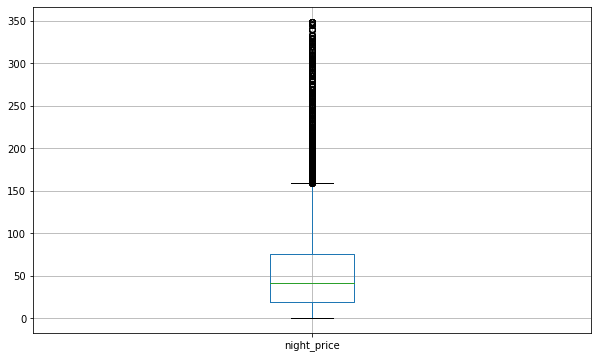

In [103]:
plt.figure(figsize=(10, 6))
airbnb[airbnb.price<350].boxplot(column=['night_price']);

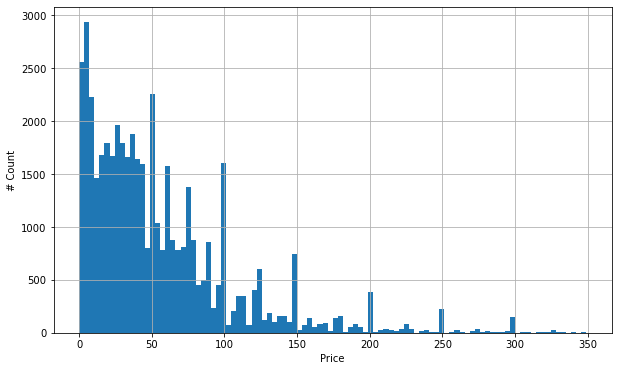

In [104]:
plt.figure(figsize=(10, 6))

airbnb[airbnb.price<350].night_price.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('Price');

In [105]:
airbnb.shape

(48892, 14)

In [106]:
airbnb_ori.shape

(48895, 16)

# Ejemplo 2 - House Data


**Cargamos los datos**

**EDA**

**Columnas numericas**

**Columnas categoricas**

## Valores Nulos